<a href="https://colab.research.google.com/github/henryduke2/ds_3001_ans/blob/main/trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

Trees are constructed starting with the root or data. Then the data is split based on the best feature and threshold to split the data. Each split or branch is designed to minimize the prediction error. The splitting stops once it reaches a certain criteria and the final group is called the leaves which gives the prediction for the model.

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

Trees use the feature thresholds to split the data up into subsets. With all of the these splits made the model is made to be complex with jagged boundaries. In contrast to linear models, which assume that there is a linear relationship between independent and depenedent variables.

3. Why is the Gini a good loss function for categorical target variables?

The Gini index works well for categorical variables because it provides a numerical index to how well split a group is. Therefore, it can provide a good loss function for when the Gini index is to high.

4. Why do trees tend to overfit, and how can this tendency be constrained?

Trees can overfit when there is a small data set or many features. This is because the trees are fit to reduce error even if this error is based on random noise. Therefore, it was the possibility to fit the training data too well. You can prune the tree using functions like max_depth, min_samples_leaf, min_samples_split.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

False, trees work very well with numeric data and can create thresholds to split the continous data.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

Multiple splits can lead to overfitting and makes for very messy trees. Binary splits allows the data to be cleaner and more interpretable.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

If a tree is over fitting, it would most likely contain very deep trees with lots of splits and high training accuracy but poor accuracy on the test set. On the other hand, with underfitting, trees would be very shallow and simplistic with overall low accuracy.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

Question 1: Load the ./data/corporate_ratings.csv dataset. How many observations and variables does it contain? Print out the first few rows of data.

In [ ]:
#Code help from gemini
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Load the dataset
df = pd.read_csv('corporate_ratings.csv')

# Print the number of observations and variables
print("Number of observations:", df.shape[0])
print("Number of variables:", df.shape[1])

# Print the first few rows of data
print(df.head())


Saving corporate_ratings.csv to corporate_ratings.csv
Number of observations: 2029
Number of variables: 31
  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432 

Question 2: Plot a histogram of the ratings variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

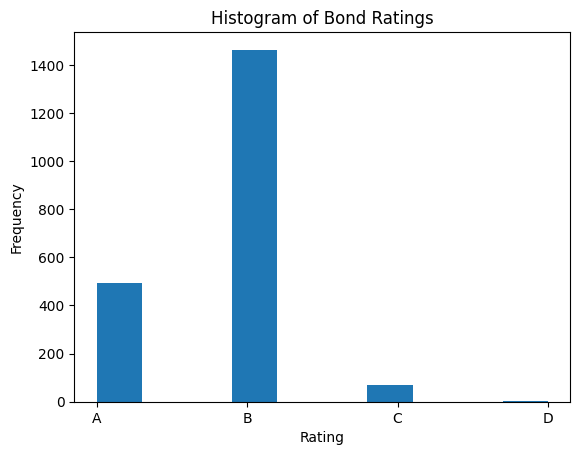

In [ ]:
#Code help from gemini

import matplotlib.pyplot as plt

# Collapse ratings
df['Rating'] = df['Rating'].replace(['AAA', 'AA'], 'A')
df['Rating'] = df['Rating'].replace(['BBB', 'BB'], 'B')
df['Rating'] = df['Rating'].replace(['CCC', 'CC', 'C'], 'C')

# Plot histogram
plt.hist(df['Rating'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Bond Ratings')
plt.show()


Question 3: Use all of the variables except Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix  X .

In [ ]:
#Code help from gemini
# Create dummy variables for the 'Sector' column
sector_dummies = pd.get_dummies(df['Sector'], prefix='Sector')

# Create the feature matrix X
X = pd.concat([df.drop(['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name', 'Sector'], axis=1), sector_dummies], axis=1)

# Display the first few rows of X
print(X.head())


   currentRatio  quickRatio  cashRatio  daysOfSalesOutstanding  \
0      0.945894    0.426395   0.099690               44.203245   
1      1.033559    0.498234   0.203120               38.991156   
2      0.963703    0.451505   0.122099               50.841385   
3      1.019851    0.510402   0.176116               41.161738   
4      0.957844    0.495432   0.141608               47.761126   

   netProfitMargin  pretaxProfitMargin  grossProfitMargin  \
0         0.037480            0.049351           0.176631   
1         0.044062            0.048857           0.175715   
2         0.032709            0.044334           0.170843   
3         0.020894           -0.012858           0.138059   
4         0.042861            0.053770           0.177720   

   operatingProfitMargin  returnOnAssets  returnOnCapitalEmployed  ...  \
0               0.061510        0.041189                 0.091514  ...   
1               0.066546        0.053204                 0.104800  ...   
2             

Question 4: Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

In [ ]:
#Code help from gemini
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np


# Define target variable y
y = df['Rating']

# Handle missing values (replace with most frequent)
for col in X.columns:
    if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].mode()[0])

# Convert to numeric if necessary
for col in X.columns:
    if not pd.api.types.is_numeric_dtype(X[col]):
        try:
            X[col] = pd.to_numeric(X[col])
        except:
            # Handle non-numeric data (e.g., one-hot encode if categorical)
            pass


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(min_samples_leaf=10) # Adjust min_samples_leaf as needed
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)





Confusion Matrix:
 [[ 47  49   0   0]
 [ 58 228   8   0]
 [  1  11   3   0]
 [  1   0   0   0]]
Accuracy: 0.6847290640394089


In [ ]:
# Question 5: If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?
#Code help from gemini
# Create dummy variables for the 'Rating Agency Name' column
rating_agency_dummies = pd.get_dummies(df['Rating Agency Name'], prefix='Agency')

# Concatenate rating agency dummies with existing features
X_with_agency = pd.concat([X, rating_agency_dummies], axis=1)

# Handle missing values (replace with most frequent)
for col in X_with_agency.columns:
    if X_with_agency[col].isnull().any():
        X_with_agency[col] = X_with_agency[col].fillna(X_with_agency[col].mode()[0])

# Convert to numeric if necessary
for col in X_with_agency.columns:
    if not pd.api.types.is_numeric_dtype(X_with_agency[col]):
        try:
            X_with_agency[col] = pd.to_numeric(X_with_agency[col])
        except:
            # Handle non-numeric data (e.g., one-hot encode if categorical)
            pass

# Split data with rating agency included
X_train_agency, X_test_agency, y_train_agency, y_test_agency = train_test_split(X_with_agency, y, test_size=0.2, random_state=42)

# Train the decision tree classifier with rating agency
clf_agency = DecisionTreeClassifier(min_samples_leaf=10) # Adjust min_samples_leaf as needed
clf_agency.fit(X_train_agency, y_train_agency)

# Make predictions
y_pred_agency = clf_agency.predict(X_test_agency)


# Evaluate the model
cm_agency = confusion_matrix(y_test_agency, y_pred_agency)
accuracy_agency = accuracy_score(y_test_agency, y_pred_agency)

print("Confusion Matrix with Rating Agency:\n", cm_agency)
print("Accuracy with Rating Agency:", accuracy_agency)

# Interpretation
print("\nInterpretation:")
if accuracy_agency > accuracy:
    print("Including the rating agency as a feature improved the model's accuracy. This suggests that the rating agency's assessment influences bond ratings, and the model is able to learn this relationship.")
elif accuracy_agency < accuracy:
    print("Including the rating agency as a feature decreased the model's accuracy. This might indicate that the rating agency information is either redundant, or introduce noise to the model.")
else:
    print("Including the rating agency did not significantly change the model's accuracy.")


Confusion Matrix with Rating Agency:
 [[ 55  41   0   0]
 [ 33 254   7   0]
 [  0  15   0   0]
 [  0   1   0   0]]
Accuracy with Rating Agency: 0.7610837438423645

Interpretation:
Including the rating agency as a feature improved the model's accuracy. This suggests that the rating agency's assessment influences bond ratings, and the model is able to learn this relationship.


**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


Question 1: Open ./data/creditcard_fraud.csv. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like V8 to protect the privacy of the clients.

In [ ]:
#Code help from gemini
import pandas as pd

# Upload the file from your local machine to the Colab environment
from google.colab import files
uploaded = files.upload()

file_name = 'creditcard_fraud_0.parquet'


try:
  df = pd.read_parquet(file_name)

  # Number of observations and variables
  n_observations = df.shape[0]
  n_variables = df.shape[1]
  print(f"Number of observations: {n_observations}")
  print(f"Number of variables: {n_variables}")

  # First few rows of data
  print("\nFirst few rows of data:")
  print(df.head())
except FileNotFoundError:
    print(f"Error: File '{file_name}' not found. Please upload the correct file.")
except Exception as e:
    print(f"An error occurred: {e}")


Saving creditcard_fraud_0.parquet to creditcard_fraud_0.parquet
Number of observations: 10000
Number of variables: 31

First few rows of data:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.

Question 2: Print a table of counts for the class variable and make a histogram. What percentage of transactions are fraudulent?


Table of counts for the 'Class' variable:
Class
0    9962
1      38
Name: count, dtype: int64


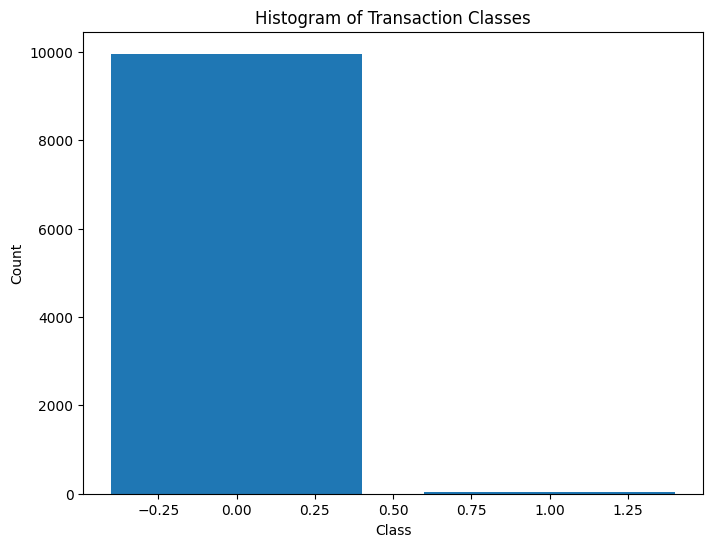


Percentage of fraudulent transactions: 0.38%


In [ ]:
#Code help from gemini
import pandas as pd
import matplotlib.pyplot as plt
class_counts = df['Class'].value_counts()
print("\nTable of counts for the 'Class' variable:")
print(class_counts)

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Histogram of Transaction Classes")
plt.show()

fraudulent_percentage = (class_counts[1] / n_observations) * 100
print(f"\nPercentage of fraudulent transactions: {fraudulent_percentage:.2f}%")


Question 3: Drop Time and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious class imbalance problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

In [ ]:
#Code help from gemini

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Drop the 'Time' column
df = df.drop('Time', axis=1)

# Define features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy}")



Confusion Matrix:
[[1987    1]
 [   2   10]]

Accuracy: 0.9985


Question 4: Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

In [ ]:
#Code help from gemini
# Calculate true positives, true negatives, false positives, and false negatives
true_positives = ((y_test == 1) & (y_pred == 1)).sum()
true_negatives = ((y_test == 0) & (y_pred == 0)).sum()
false_positives = ((y_test == 0) & (y_pred == 1)).sum()
false_negatives = ((y_test == 1) & (y_pred == 0)).sum()

# Money saved that should be saved
# Use the index of y_test to access the corresponding rows in df
saved_money = df.loc[y_test[y_test == 1].index, 'Amount'].sum()

# Money lost to fraud
lost_money = df.loc[y_test[(y_test == 1) & (y_pred == 0)].index, 'Amount'].sum()

# Money withheld in error
withheld_money = df.loc[y_test[(y_test == 0) & (y_pred == 1)].index, 'Amount'].sum()

print("Money saved that should be saved:", saved_money)
print("Money lost to fraud:", lost_money)
print("Money withheld in error from customers:", withheld_money)



Money saved that should be saved: 776.66
Money lost to fraud: 530.0
Money withheld in error from customers: 39.0


I'd say since the amount of money saved is close to the sum of the money lost and the money witheld. Blocking every transaction labeled as fraud might not be totally efficient, but could be somewhat useful.

Question 5: Instead of predicting fraud, predict loss: Multiple the Class variable times the Amount variable, and call it Loss. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What  R2  and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?

R-squared: 0.030768675535162382
RMSE: 12.361341612058135


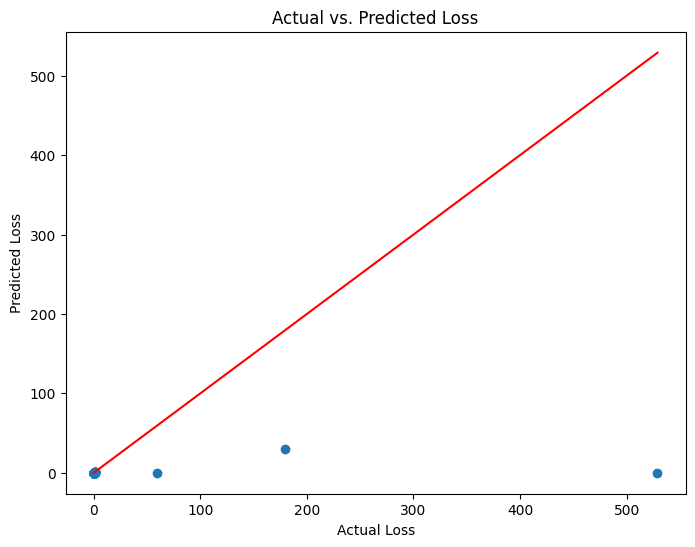

In [ ]:
#Code help from gemini

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create the 'Loss' column
df['Loss'] = df['Class'] * df['Amount']

# Define features (X) and target (y) for loss prediction
X = df.drop(['Class', 'Loss'], axis=1)
y = df['Loss']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

# Scatterplot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Loss")
plt.ylabel("Predicted Loss")
plt.title("Actual vs. Predicted Loss")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Add a diagonal line
plt.show()



From the scatterplot and R squared, it deosn't look like this model is particularly useful and no patterns are really evident.

**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?